In [7]:
import numpy as np
import scipy as sp
from numpy import linalg as nla
import matplotlib.pyplot as plt

In [8]:
delta=np.linspace(0.167,0.382,100)
a=6.8927
k=0.4032
c=2.3952
rho=np.linspace(0.21,0.51,100)


In [9]:
def model(r,d,p):
    x=r[0]
    y=r[1]
    z=r[2]
    x1=1.0*(p*d*(x*x-a*x)+x*(x+y+c-c*np.tanh(x+z)))
    y1=-1.0*p*d*(a*y+x*x)
    z1=d*(k-z-0.5*x)
    return np.array([x1,y1,z1])

In [10]:
def jac(r,d,p):
    x=r[0]
    y=r[1]
    z=r[2]
    M=np.array([[-c*np.tanh(x + z) + c + d*p*(-a + 2*x) + x*(-c*(1 - np.tanh(x + z)**2) + 1) + x + y,x,-c*x*(1 - np.tanh(x + z)**2)],
                [-2*x*p*d,-p*d*a,0],
                [-d*0.5,0,-d]])
    return M

In [15]:
def mul(r,d,p,g):
    res=np.matmul(jac(r,d,p),g)
    return res

In [21]:
def integration():
    exp1=np.zeros((100,100))
    counter_y=0
    for i in delta:
        counter_x=0
        for j in rho:
            g1=np.array([1,0,0])
            tmax=500
            h=0.01
            t=0
            x=-3
            y=0
            z=0
            r=np.array([x,y,z])
            talp=0

            # Time loop
            while (t<tmax):
                xt=r[0]
                yt=r[1]
                zt=r[2]

                #evolution of the perturbations along the Lyapunov directions
                l1=mul(r,i,j,g1)
                l2=mul(r,i,j,g1+0.5*h*l1)
                l3=mul(r,i,j,g1+0.5*h*l2)
                l4=mul(r,i,j,g1+h*l3)
                g1=g1+(1.0/6)*h*(l1+2*l2+2*l3+l4)

                # Gram-Schmittage
                #1er exposant
                norm=np.linalg.norm(g1)
                alp=np.log(norm)/h
                talp=talp+alp
                g1=g1/norm

                #2eme exposant
                #g2p=g2-g1*(np.dot(g2,g1))
                #norm2=np.linalg.norm(g2p)
                #alp2=np.log(norm2)/h
                #talp2=talp2+alp2
                #g2=g2p/norm2

                #3eme exposant
                #g3p=(g3-g2*(np.dot(g3,g2))-g1*(np.dot(g3,g1)))
                #norm3=np.linalg.norm(g3p)
                #alp3=np.log(norm3)/h
                #talp3=talp3+alp3
                #g3=g3p/norm3

                # Gathering the new directions into a matrix
                #g=np.hstack([g1[:,np.newaxis],g2[:,np.newaxis],g3[:,np.newaxis]])

                # Model time evolution
                k1=model(r,i,j)
                k2=model(r+0.5*h*k1,i,j)
                k3=model(r+0.5*h*k2,i,j)
                k4=model(r+k3*h,i,j)
                r=r+(1.0/6)*h*(k1+2*k2+2*k3+k4)
                t=t+h
            
        # Storing the results
            
            l1=talp/tmax
            #l2=talp2/tmax
            #l3=talp3/tmax
            exp1[counter_x,counter_y]=l1
            counter_x+=1
            #exp2.append(l2)
            #exp3.append(l3)
        counter_y+=1
    return(exp1)

In [ ]:
results=integration()

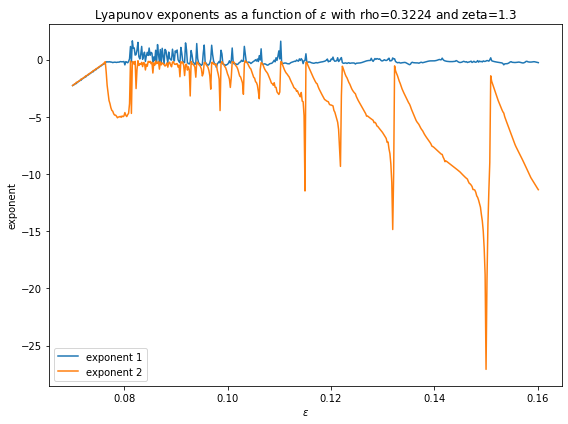

In [12]:
fig, ax1 = plt.subplots(figsize=(8,6))

color = 'tab:blue'
ax1.set_xlabel('$\epsilon$')
ax1.set_ylabel('exponent')
ax1.set_title('Lyapunov exponents as a function of $\epsilon$ with rho=0.3224 and zeta=1.3')
ax1.plot(epsi, results[0], color=color, label='exponent 1')

color = 'tab:orange'
ax1.set_xlabel('$\epsilon$')
ax1.plot(epsi, results[1], color=color, label='exponent 2')

plt.legend()
fig.tight_layout()  
plt.show()